In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [121]:
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'C:\Users\masan\Downloads\Real estate.csv')


In [113]:
df.isnull().sum().sum() #Check for null values

0

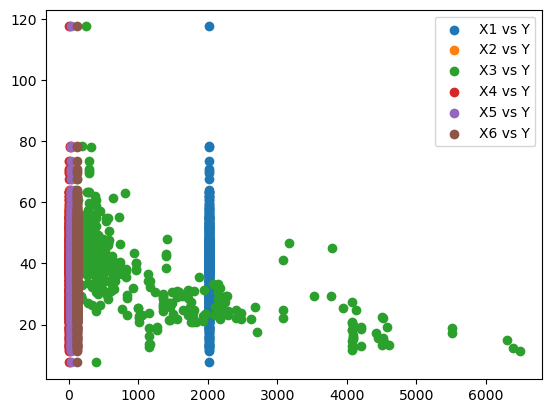

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [118]:
X1 = df['X1 transaction date']
X2 = df['X2 house age']
X3 = df['X3 distance to the nearest MRT station']
X4 = df['X4 number of convenience stores']
X5 = df['X5 latitude']
X6 = df['X6 longitude']
y  = df['Y house price of unit area']
X = df.drop(["No"],axis = 1)
# plotting
plt.scatter(X1,y,label ='X1 vs Y')
plt.scatter(X2,y,label ='X2 vs Y')
plt.scatter(X3,y,label ='X3 vs Y')
plt.scatter(X4,y,label ='X4 vs Y')
plt.scatter(X5,y,label ='X5 vs Y')
plt.scatter(X6,y,label ='X6 vs Y')
plt.legend()
plt.show()
print(y)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)
X, y = make_regression(n_samples=414, n_features=1, noise=10, random_state= 42 )
lr_model = LinearRegression(0.05,2500)
lr_model.fit(X_train_n, y_train)
y_predicted = lr_model.predict(X_test_n)

[[66.33705547]] [[-23.4191576]]


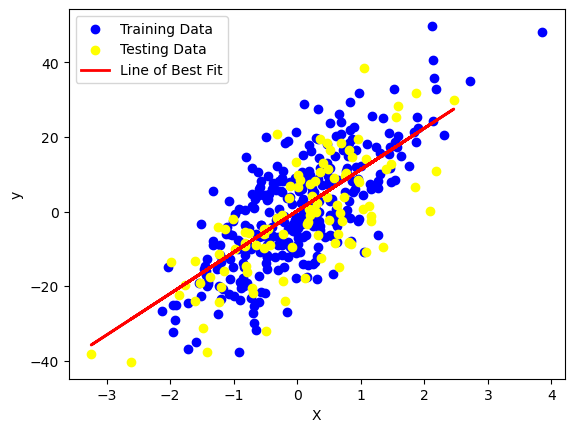

In [135]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='yellow', label='Testing Data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Line of Best Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [132]:
mse = mean_squared_error(y_train, lr_model.predict(X_train_n))
print('Mean Squared Error:', mse)

[[56.46543599]] [[-28.42970842]]
Mean Squared Error: 107.67674430208189


In [136]:
r2 = r2_score(y_train, lr_model.predict(X_train_n))
print('R2:', r2)

[[66.33705547]] [[-23.4191576]]
R2: 0.5372872135945462


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [139]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

cancer = datasets.load_breast_cancer()
X,y = cancer.data,cancer.target



scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)



5. Write code for the sigmoid function and Logistic regression.


In [152]:
class sigmoid:
    def sigmoid(z):
        a=1.0/(1.0+ np.exp(-z))
        return a
    def derivative(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        #initiate 
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)
         #gd 
        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)
            
            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict the output
y_pred = logreg.predict(X_test)

9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [155]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Report:',classification_report(y_test,y_pred))
print('Matrix:',confusion_matrix(y_test,y_pred))

Accuracy: 0.9824561403508771
Report:               precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.97      1.00      0.99       111

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Matrix: [[ 57   3]
 [  0 111]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [233]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\masan\Downloads\glass.csv')
# X and Y column
data.rename(columns={'RI': '1','Na': '2','Mg': '3','Al': '4','Si': '5','K': '6','Ca': '7','Ba': '8','Fe': '9','Type': '10'}, inplace=True)
X = data.drop(["10"],axis = 1)
Y = data['10']
x = X.values
y = Y.values
print(data.head(5))
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


         1      2     3     4      5     6     7    8    9  10
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [231]:
import numpy as np
from collections import Counter


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [232]:
# Use the Model
Knn=KNN(k=3)
Knn.fit(x_train,y_train)
predictions=Knn.predict(x_test)
print(accuracy(predictions,y_test))


0.7384615384615385


In [174]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
knn_model = knn(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print('Predictions:',y_pred)
print('Accuracy:',accuracy_score(y_test,y_pred))

Predictions: [6 7 2 2 2 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 7 2 1 1 1 2 2 1 1 5 2 1 1 1 2 1
 1 2 1 1 7 7 1 7 1 2 1 2 7 2 1 1 2 5 2 7 1 1 7 2 6 2 2 1]
Accuracy: 0.7230769230769231
